#### Diplomado en Ciencia de Datos
Módulo 2: Business Intelligence  
## Tema 4: Consideraciones Éticas

*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

---
![](../img/header.jpg)

# Consideraciones éticas en el uso de Algorítmos de Similitud

Los algoritmos de similitud miden cuán parecidos son dos objetos en función de características específicas, como en las distancias Euclidiana, Manhattan o la Similitud Coseno. Sin embargo, **es importante considerar el contexto y las implicaciones éticas al definir "similitud"**. La interpretación de similitud puede ser problemática cuando se asume que características seleccionadas (como ingresos o nivel educativo) son suficientes para capturar la esencia de los datos. En aplicaciones como contratación o análisis de crédito, esta suposición puede llevar a decisiones injustas o discriminatorias.

La relevancia contextual también es clave: **lo que define similitud en un contexto (como investigación médica) puede no ser adecuado en otro (como marketing), y no considerar estas diferencias puede llevar a conclusiones erróneas**. Finalmente, el impacto en la toma de decisiones es crítico. Los algoritmos de similitud influyen en decisiones importantes y deben evitar causar daño a grupos o individuos. Asumir que dos objetos similares en un espacio matemático son iguales en la vida real puede tener graves consecuencias si no se toma en cuenta el contexto.

Al utilizar estos algoritmos, es fundamental reflexionar sobre el impacto de las decisiones basadas en ellos para garantizar que no refuercen desigualdades ni causen daños involuntarios.


**Original blog implementing the most popular similarity algorithms**  

✅ [dataaspirant.com](https://dataaspirant.com/five-most-popular-similarity-measures-implementation-in-python/)

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cover_post_final.png?w=1000&ssl=1)

---
# EJERCICIO 1

- Desarrolla una funcion en Python que calcule la [distancia euclidiana](https://www.google.com/search?sca_esv=08fa89593227d7c4&sca_upv=1&sxsrf=ADLYWILxL5ZB2RJ2Ur94L62oXEBk5CorNg:1725814856550&q=euclidean+distance+formula&source=lnms&fbs=AEQNm0Aa4sjWe7Rqy32pFwRj0UkWd8nbOJfsBGGB5IQQO6L3J_86uWOeqwdnV0yaSF-x2joQcoZ-0Q2Udkt2zEybT7HdNV1kobqvEwEVRYBCltlBtd67W1w89UVGf7QOAkvJWcD0qzhOT-WizJ4nyd1QOGdS_33AboApQh8NDOYXDdgzT_HrFjEfW4zkALzuIfB9KacfX-PQ&sa=X&ved=2ahUKEwiMteOr6bOIAxVX9rsIHW25HdMQ0pQJegQIDRAB&biw=1920&bih=974&dpr=1)
- Prueba la función con los siguientes vectores:  
 `v1 = [0,1,2,5,6]`  
 `v2 = [0,2,3,5,7]`  
- El resultado debe ser aprox `1.73`

In [10]:
import math

def euclidean_distance(x, y):
    if len(x) != len(y):
        raise ValueError("Los puntos deben tener la misma dimensión")
    return math.sqrt(sum((y_i - x_i)**2 for x_i,y_i in zip(x,y)))
 

v1 = [0,1,2,5,6]
v2 = [0,2,3,5,7]

euclidean_distance(v1,v2)


1.7320508075688772

---
# EJERCICIO 2

- Desarrolla una funcion en Python que calcule la [distancia manhattan](https://www.google.com/search?q=manhattan+distance+formula&sca_esv=08fa89593227d7c4&sca_upv=1&biw=1920&bih=974&ei=V9jdZtmAEoiwi-gP-9nf-AI&oq=euclidean+distance+formula&gs_lp=Egxnd3Mtd2l6LXNlcnAiGmV1Y2xpZGVhbiBkaXN0YW5jZSBmb3JtdWxhKgIIADIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzIKEAAYsAMY1gQYRzINEAAYgAQYsAMYQxiKBTINEAAYgAQYsAMYQxiKBUiLElAAWABwAngBkAEAmAEAoAEAqgEAuAEDyAEAmAICoAIQmAMAiAYBkAYKkgcBMqAHAA&sclient=gws-wiz-serp)
- Prueba la función con los siguientes vectores:  
 `v1 = [0,1,2,5,6]`  
 `v2 = [0,2,3,5,7]`  
- El resultado debe ser `3`

In [12]:
def manhattan_distance(x, y):
    if len(x) != len(y):
        raise ValueError("Los puntos deben tener la misma dimensión")
    return sum(abs(x_i - y_i) for x_i, y_i in zip(x, y))

v1 = [0,1,2,5,6]
v2 = [0,2,3,5,7]

manhattan_distance(v1,v2)

3

---
# EJERCICIO 3 (Opcional)

- Desarrolla una funcion en Python que calcule la [distancia coseno](https://en.wikipedia.org/wiki/Cosine_similarity)
- Prueba la función con los siguientes vectores:  
 `v1 = [0,1,2,5,6]`  
 `v2 = [0,2,3,5,7]`  
- El resultado debe ser `0.99`

## Constructing a Similarity Network from a Dataset

The idea is to compute one similarity alorithm N*N times across the dataset, then take the top M similar records and constructa network

In [14]:
import pandas as pd

dataset = pd.read_csv("../data/gapminder_data_world_health.csv")

---
# EJERCICIO 4

Con los datos de `gapminder_data_world_health.csv` utiliza el siguiente subset de la tabla como se muestra a continuación (es un query de el año 2007 en el que se tiene la esperanza de vida y la población indexada por país)

In [24]:
df = dataset[dataset['year'] == 2007].set_index('country')
df = df[['lifeExp', 'pop']]
df.head(10)

lifeExp        pop
country                        
Afghanistan   43.828   31889923
Albania       76.423    3600523
Algeria       72.301   33333216
Angola        42.731   12420476
Argentina     75.320   40301927
Australia     81.235   20434176
Austria       79.829    8199783
Bahrain       75.635     708573
Bangladesh    64.062  150448339
Belgium       79.441   10392226

- **Utiliza el método Min-Max** para normalizar los vectores de Esperanza de vida y de Población, una vez que apliquemos las funciones de similitud es mejor tener los vectores en las misma escala: [Ejemplo aquí](https://www.geeksforgeeks.org/data-normalization-with-pandas/)

In [18]:
df_min_max_scaled = df.copy() 

# apply normalization 
for column in df_min_max_scaled.columns: 
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	 


print(df_min_max_scaled)



                     lifeExp       pop
country                               
Afghanistan         0.098046  0.024035
Albania             0.856246  0.002579
Algeria             0.760363  0.025130
Angola              0.072528  0.009269
Argentina           0.830589  0.030416
...                      ...       ...
Vietnam             0.805676  0.064516
West Bank and Gaza  0.786439  0.002896
Yemen, Rep.         0.536985  0.016695
Zambia              0.064457  0.008757
Zimbabwe            0.090114  0.009186

[142 rows x 2 columns]


---
# EJERCICIO 5

**Crea un un nuevo dataset con los 3 paises más cercanos a cada país**, es decir un **dataset de 
distancias**, el resultado que se busca es como se ve en la imagen. Utilizarás el subset normalizado (ejercicio 4) para ello y una de las funciones que creaste (manhattan, euclideana o coseno)

![](../img/distancias.png)

**Cómo crear el dataset de distancias?**
- Por cada país, necesitas calcular la distancia entre él y todos los demás países en el DataFrame. Evitando comparar cada país consigo mismo.
- Cada iteración corresponde a cada país comparado, el país al que se le calculó la distancia, y la distancia entre ambos. (hint: una lista de tuplas o diccionarios puede ser útil aquí)
- Después de hacer todas las comparaciones, convierte los resultados en un DataFrame con tres columnas: `nodeA`, `nodeB`, `distance`.
- Para cada país (nodeA), agrupa las distancias calculadas y ordénalas de menor a mayor. Se quiere unicamente los tres países más cercanos a cada país (distancias más pequeñas para cada país)
- No olvides revisar los resultados una vez que tengas la tabla final con los 3 países más cercanos para cada país

In [34]:

## for loop in all countries applying 1 distance function


## dataframe _____


## top 3 distances ____

## for loop in all countries applying 1 distance function
country = list(set(df.index))
data = []
for c1 in country:
    for c2 in country:
        if c1 != c2:
            ventor1 = df_min_max_scaled[df_min_max_scaled.index == c1].iloc[0].tolist()
            vector2 = df_min_max_scaled[df_min_max_scaled.index == c2].iloc[0].tolist()
            data.append([c1, c2, euclidean_distance(ventor1,vector2)])
        else:
            print("No se encontraron distintos paises")
        
## dataframe _____
df_network= pd.DataFrame(data, columns=["nodeA", "nodeB", "distance"])

## top 3 distances ____
df_network.sort_values("distance").head()

No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron distintos paises
No se encontraron di

nodeA        nodeB  distance
18176  New Zealand       Norway  0.000431
18317       Norway  New Zealand  0.000431
14623  Puerto Rico   Costa Rica  0.000850
14202   Costa Rica  Puerto Rico  0.000850
9099       Uruguay      Albania  0.000915

---
# EJERCICIO 6

Reproduce el siguiente script.   
El script utiliza la libreria `networkx` y `plotly` para visualizar una gráfica de red (network plot) visualizando la distancia (similitud) entre los paises basado en esperanza de vida y población.  

**Nota:** Si el dataframe del ejercicio anterior no es correcto, la visualización no va a funcionar.

**Responde lo siguiente:**
- Cuales son los países más similares a México?
- Explica cuales serían las consideraciones éticas al decir que México es similar a esos países en el contexto de las variables `lifeExp` y `pop`, dando contexto de el año seleccionado y del significado de la funcion de similitud utilizada

In [22]:
!pip install networkx


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [35]:


import networkx as nx


#Empty graph object
g = nx.Graph()

# Adding all nodes
g.add_nodes_from(list(df_network.nodeA.unique()))

# Adding all edges
edges_list = [(row[1][0],row[1][1],row[1][2]) for row in df_network.iterrows()]
g.add_weighted_edges_from(edges_list)

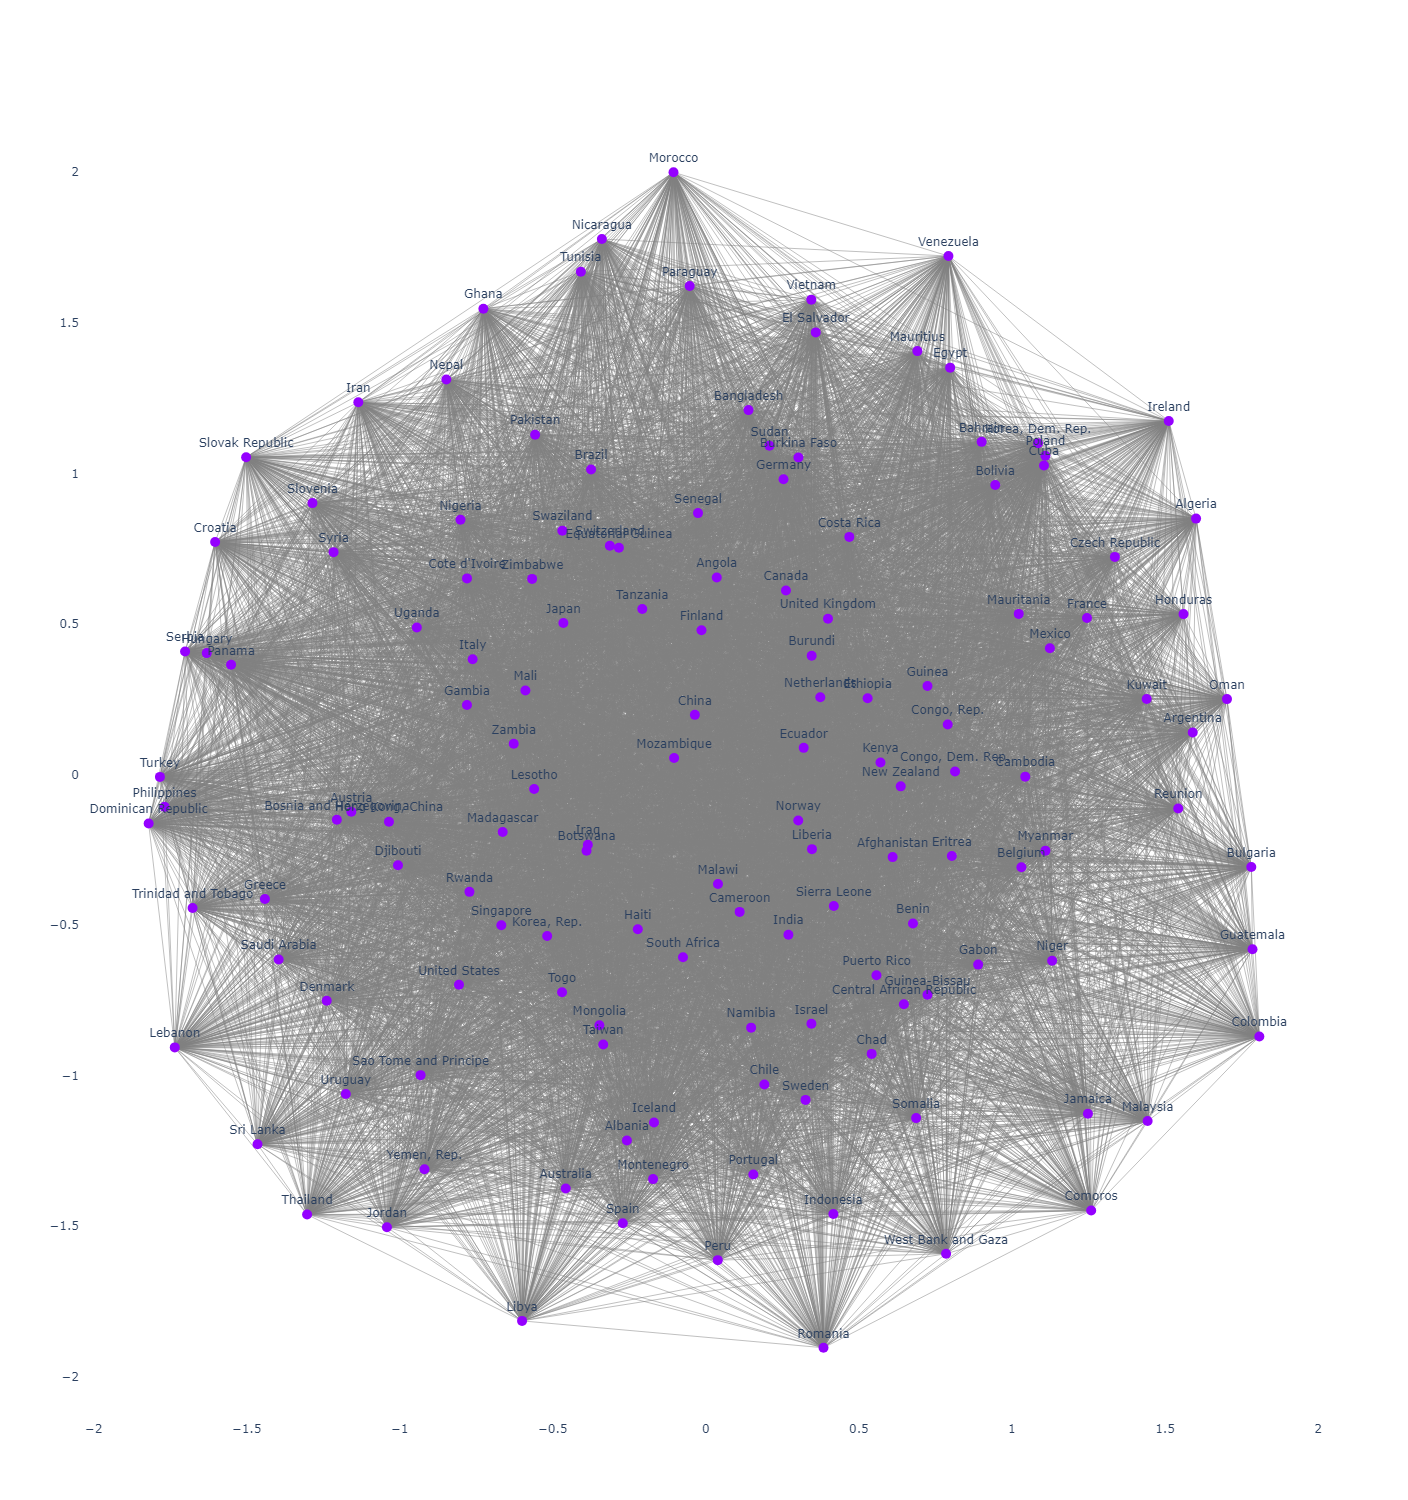

In [36]:
import plotly.graph_objects as go

pos = nx.spring_layout(g, dim=2, iterations=10, weight='weight', scale=2)

# Create a DataFrame for nodes
node_x = []
node_y = []
for node in g.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Create a DataFrame for edges
edge_x = []
edge_y = []
for edge in g.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # For a break between edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)  # For a break between edges

# Create the plot
fig = go.Figure()

# Add edges to the plot
fig.add_trace(go.Scatter(x=edge_x, y=edge_y,
                         line=dict(width=0.5, color='gray'),
                         hoverinfo='none',
                         mode='lines'))

# Add nodes to the plot
fig.add_trace(go.Scatter(x=node_x, y=node_y,
                         mode='markers+text',  # Show both markers and labels
                         marker=dict(size=10, color='#9500ff'),
                         text=[str(node) for node in g.nodes()],  # Add node labels
                         textposition='top center',
                         hoverinfo='text'))

# Update layout for better aesthetics and set figure size
fig.update_layout(
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white',
    width=1200,  # Set the figure width
    height=1500   # Set the figure height
)

# Display the plot
fig.show()

La gráfica debe quedar como se ve en la imagen.   
![](../img/countries_similarities.png)

## 🎉🎉 Congrats!!  

## You've finished the notebook